# KNN Project

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Read data with panda
df2=pd.read_csv('KNN_Project_Data')

In [3]:
df2.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [4]:
df=df2.drop(['TARGET CLASS'],axis=1)

In [5]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792


# EDA

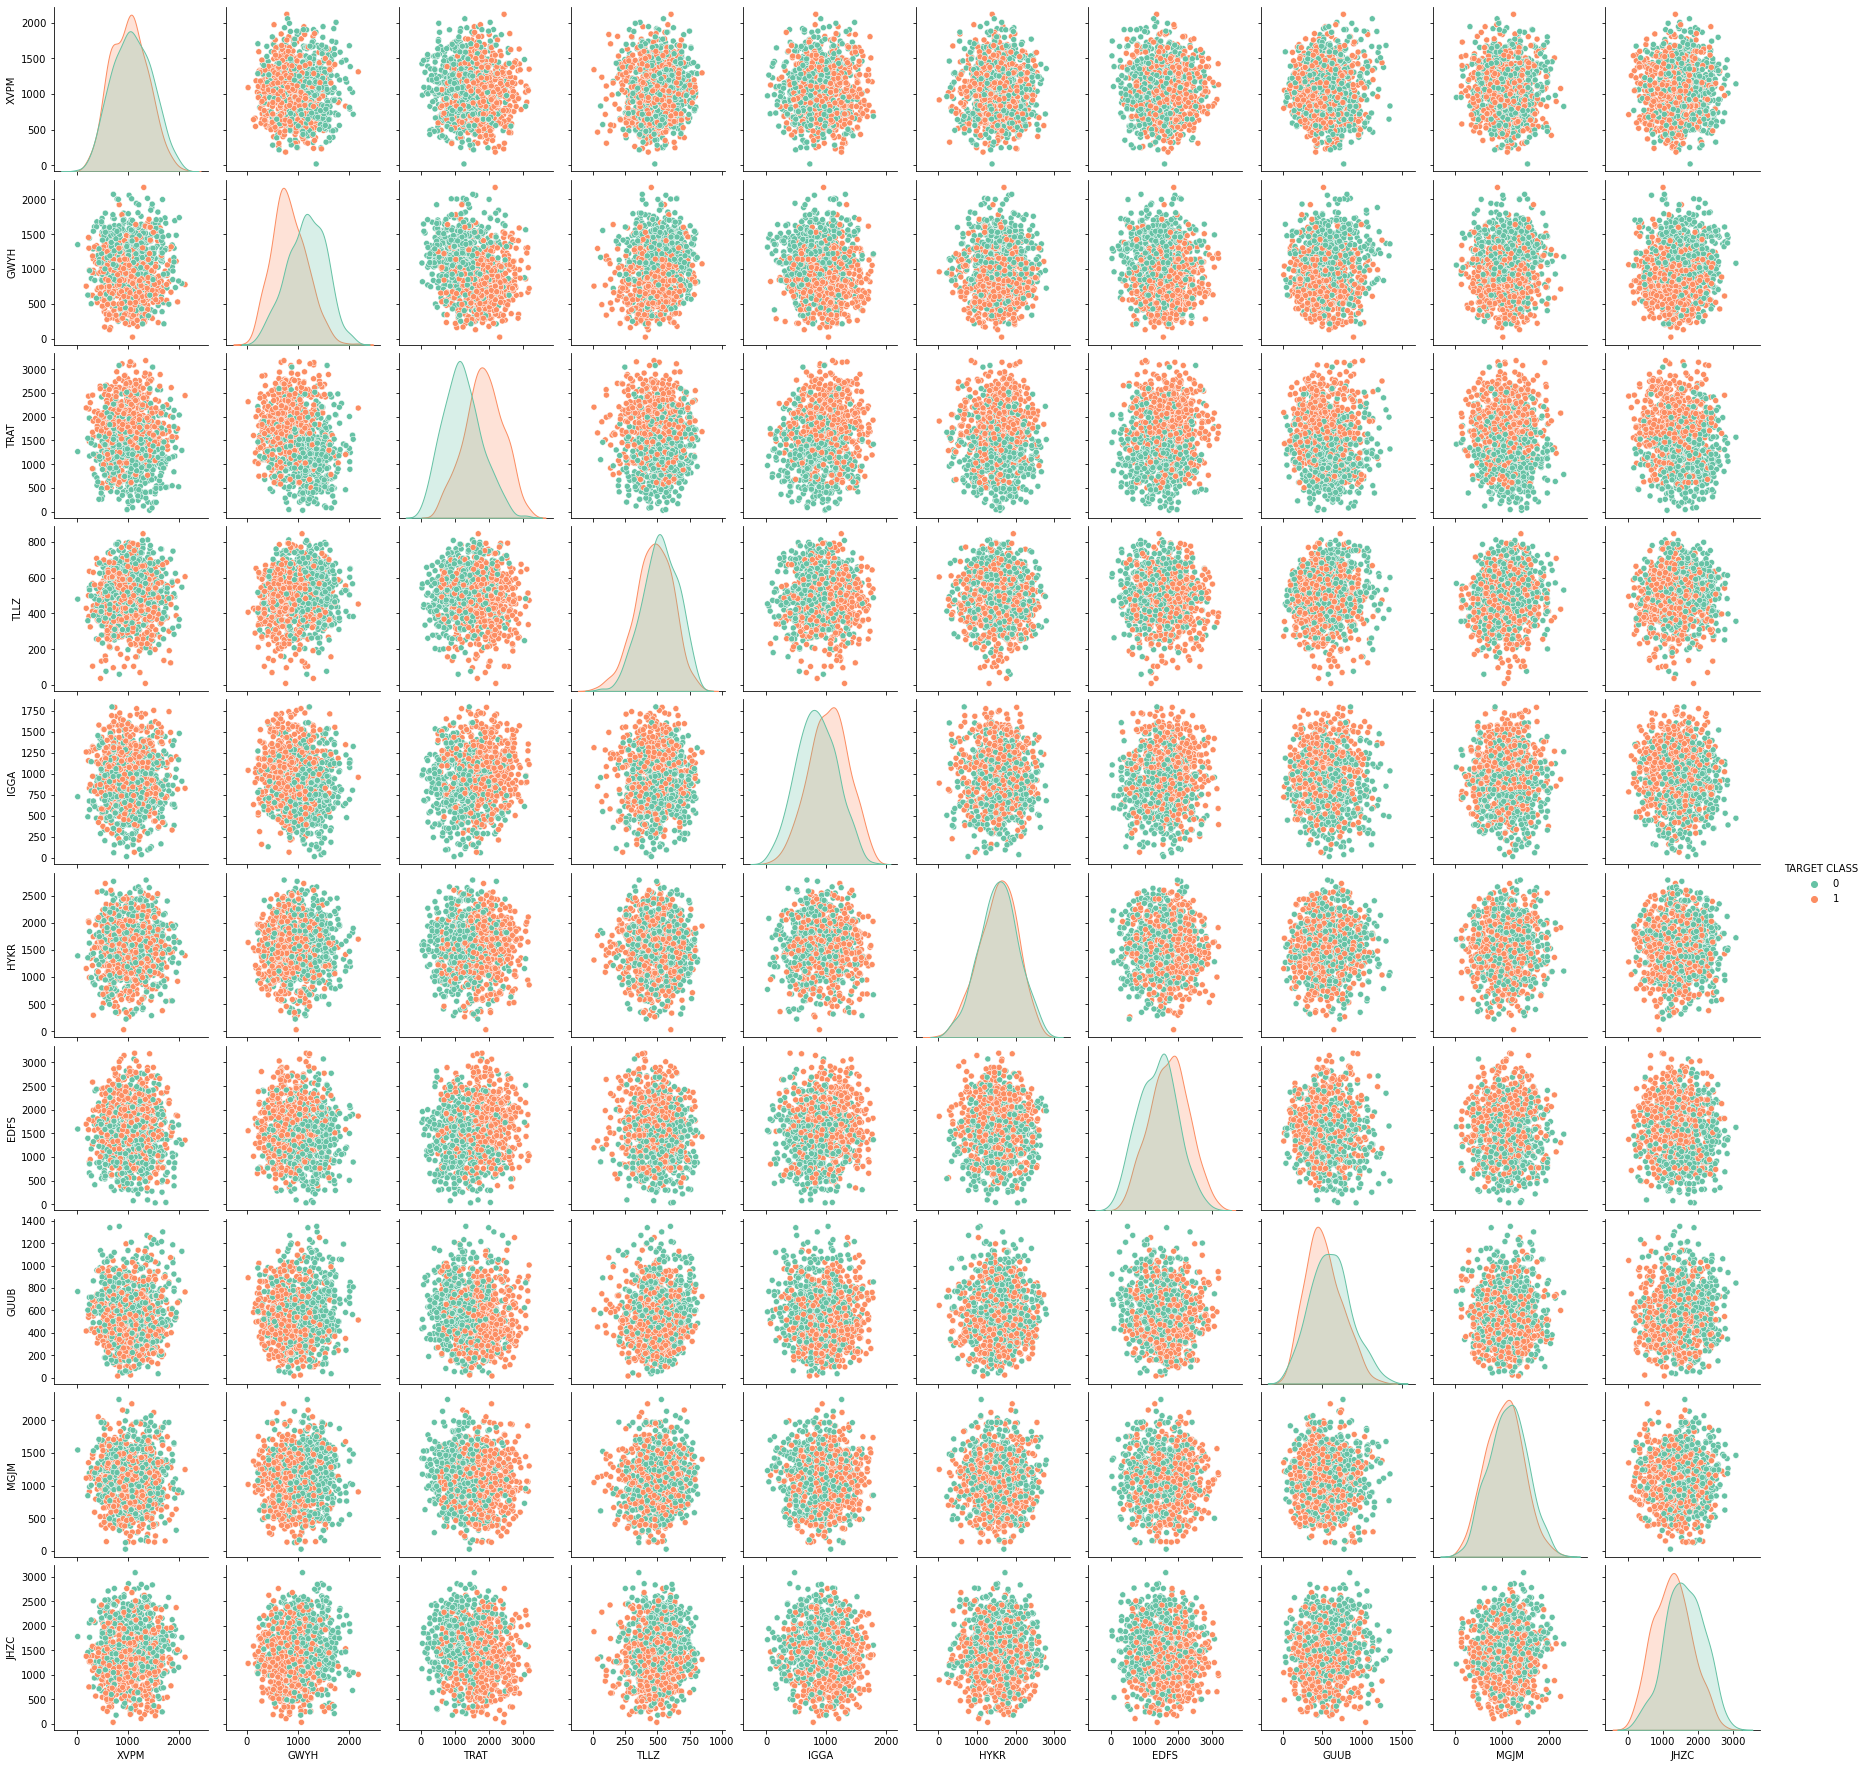

In [6]:
#Use seaborn for visulazing data
sns.pairplot(df2,hue='TARGET CLASS',palette='Set2')

# Standrize the Variable

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler= StandardScaler()

In [9]:
scaler.fit(df)

StandardScaler()

In [10]:
scaled_features=scaler.transform(df)

In [11]:
df_feat=pd.DataFrame(scaled_features,columns=df.columns)

In [12]:
df_feat.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


# Test Train Split

In [13]:
X_train=df_feat
y_train=df2['TARGET CLASS']

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
 X_train, X_test, y_train, y_test = train_test_split( df_feat,df2['TARGET CLASS'], test_size=0.3, random_state=101)
    

# Using KNN

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
knn=KNeighborsClassifier( n_neighbors=1)

In [18]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [19]:
pred=knn.predict(X_test)

# prediction and evaluation of the model

In [20]:
from sklearn.metrics import classification_report,confusion_matrix

In [21]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.73      0.72      0.72       152
           1       0.71      0.72      0.72       148

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300



In [22]:
print(confusion_matrix(y_test,pred))

[[109  43]
 [ 41 107]]


# Choosing a K value:

In [27]:
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    

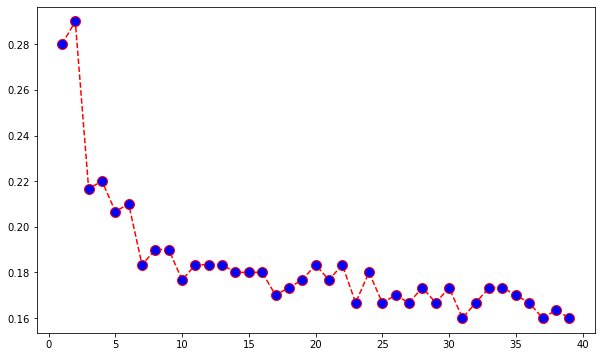

In [28]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='red',linestyle='--',marker='o',markerfacecolor='blue',markersize=10)
plt.title=('Eroor Rate vs K value')
plt.xlabel=('Range')
plt.ylabel=('Eroor Rate')

In [29]:
knn=KNeighborsClassifier( n_neighbors=32)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)

print('WITH K=32')
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

WITH K=32
              precision    recall  f1-score   support

           0       0.85      0.82      0.83       152
           1       0.82      0.85      0.83       148

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300

[[124  28]
 [ 22 126]]
